In [37]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [38]:
def coin(pocket='bias',p=0.7,size=100):
    if pocket == 'fair':
        outcome = np.random.choice(['H','T'],size=size,p=[.5,.5])
        return outcome,pocket,p
    elif pocket == 'bias':
        outcome = []
        for ii in range(size):
            select = np.random.choice(['Head bias','Tail bias'],size=1,p=[.5,.5])
            #print(select)
            if select == 'Head bias':
                outcome.append(np.random.choice(['H','T'],size=1,p=[p,1-p])[0])
                
            elif select == 'Tail bias':
                outcome.append(np.random.choice(['H','T'],size=1,p=[1-p,p])[0])
        return np.array(outcome),pocket,p        
    else:
        print('Specify if the coin is bias or fair')
        return None

In [45]:
results=[];Head_counts=[];pocket_picked=[]
n_flips=1000;
for ii in range(500):
    get_pocket = np.random.choice(['fair','bias'],size=1,p=[.5,.5])
    outcomes = coin(pocket=get_pocket,size=n_flips,p=0.9)
    Head_count = pd.DataFrame({'outcome':outcomes[0]})['outcome'].map({'T':0,'H':1}).sum()
    results.append(outcomes)
    Head_counts.append(Head_count)
    pocket_picked.append(get_pocket[0])

In [46]:
df = pd.DataFrame({'head_counts':np.array(Head_counts),'pocket_picked':pocket_picked})

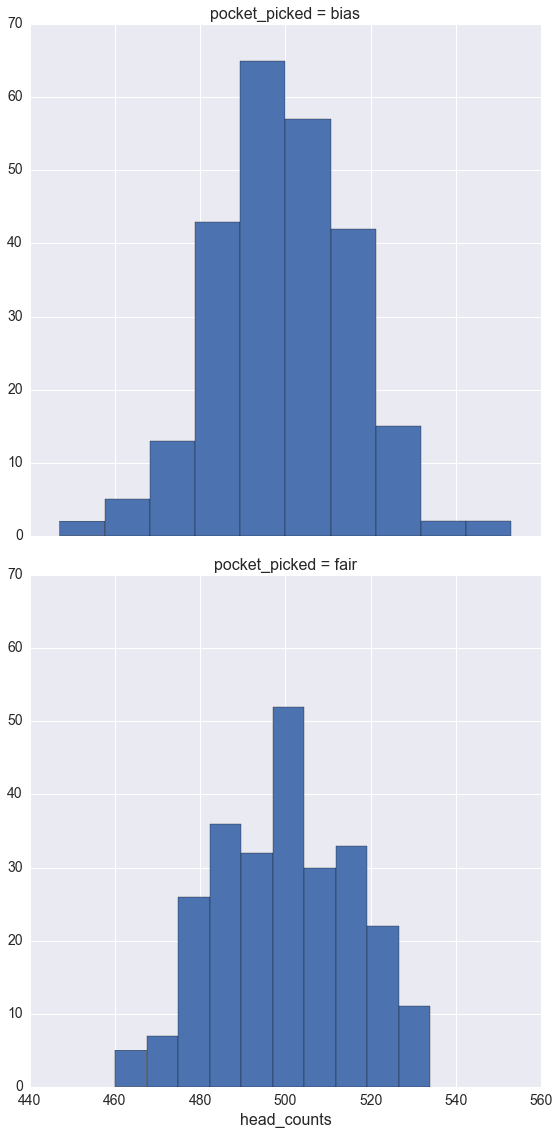

In [47]:
g = sns.FacetGrid(row='pocket_picked',data=df,size=8)
g.map(plt.hist,'head_counts')